## LING 521: Applied English Grammar
### Text Analysis Script #1 
TODO: write up an intro

### Part 1. Load Dependencies
Import the required packages (install them if you haven't already)

In [1]:
#import string
import sys
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import pandas as pd
#from jupyter_datatables import init_datatables_mode
from IPython.display import display, HTML
#init_datatables_mode()

#%matplotlib inline
%matplotlib notebook

Verify software dependencies loaded: 

In [2]:
print(sys.version)
print("My library versions:")
print(f"matplotlib: {matplotlib.__version__}")
print(f"ntlk: {nltk.__version__}")
print(f"Numpy: {np.__version__}")

#print(f"Pandas: {pd.__version__}")
#print(f"Scipy: {sp.__version__}")
#print(f"nose: {nose.__version__}")

3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)]
My library versions:
matplotlib: 3.1.1
ntlk: 3.4.5
Numpy: 1.17.3


### 2. Load Natural Language Processing Tool Kit (NLTK) Package
NLTK POS Taggers:

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('tagsets')
# Show definition of tags
# tagset_upenn = nltk.help.upenn_tagset()

# Function Words: We explored using NLTK stop words, but ultimately we did not use it
# We combined ADP, PRON, DET, CONJ into Inserts
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stops = set(stopwords.words("english"))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

### 3. Load Corpora:

In [4]:
insert_words = ('yeah', 'Ok', 'ahh')

messages = ['Gym?',
            'yeah be there in about a half',
            'Ok see you when you get here!',
            'Seconds away',
            'Meet me between smith and cramer asap',
            'I got you and Taylor tix in pit section.',
            'Get some milk please',
            'Chk email',
            'Made it',
            'Do u know where u saved that movie on my compute',
            'Im meeting some dude from the internet for happy hour ahh!',
            'Wed is dinner for renetta call us soon',
            'where r u???',
            'pinball']

### 4. Tag POS in 2007 Text Messages:
Iterate thru each text message in our 2007 Text Message Corpus and tag the PART-OF-SPEECH of each word.

<b>NOTE:</b> We could have written this code to simply get the counts on the whole corpus,
but for this assignment, message level analysis made it easier to confirm with manual counts.

This is how the tagset would look like if we simply used the upenn tagset:<br>
Counter({'NOUN': 29, 'VERB': 12, 'ADP': 9, 'ADV': 8, 'PRON': 8, '.': 7, 'DET': 4, 'ADJ': 3, 'CONJ': 2})

However, in order to satisfy the requirements, we need to modify our tagset as follows:
1. Inserts: Check if a word is in our inserts set
2. Function Words: Combine ADP, PRON, DET, CONJ into FUNCTOR
3. Remove Punctuation

In [5]:
counter_list = []
words = defaultdict(list)

for msg in messages:
    tokens = nltk.word_tokenize(msg)
    word_tag_pairs = nltk.pos_tag(tokens, tagset='universal')
    print(f"\nRaw Message: {msg}")
    print(f"Words with POS Tags: {word_tag_pairs}")

    # Build a dictionary of words, grouped by POS
    for w, tag in word_tag_pairs:
        if w in insert_words:
            tag = "Inserts"
            words[tag].append(w)
        elif tag in ('PRON', 'DET', 'ADP', 'CONJ'):
            tag = "FUNCTOR"
            words[tag].append(w)
        elif tag != '.':
            words[tag].append(w)


Raw Message: Gym?
Words with POS Tags: [('Gym', 'NOUN'), ('?', '.')]

Raw Message: yeah be there in about a half
Words with POS Tags: [('yeah', 'ADV'), ('be', 'VERB'), ('there', 'ADV'), ('in', 'ADP'), ('about', 'ADP'), ('a', 'DET'), ('half', 'NOUN')]

Raw Message: Ok see you when you get here!
Words with POS Tags: [('Ok', 'NOUN'), ('see', 'VERB'), ('you', 'PRON'), ('when', 'ADV'), ('you', 'PRON'), ('get', 'VERB'), ('here', 'ADV'), ('!', '.')]

Raw Message: Seconds away
Words with POS Tags: [('Seconds', 'VERB'), ('away', 'ADV')]

Raw Message: Meet me between smith and cramer asap
Words with POS Tags: [('Meet', 'VERB'), ('me', 'PRON'), ('between', 'ADP'), ('smith', 'NOUN'), ('and', 'CONJ'), ('cramer', 'NOUN'), ('asap', 'NOUN')]

Raw Message: I got you and Taylor tix in pit section.
Words with POS Tags: [('I', 'PRON'), ('got', 'VERB'), ('you', 'PRON'), ('and', 'CONJ'), ('Taylor', 'NOUN'), ('tix', 'NOUN'), ('in', 'ADP'), ('pit', 'ADJ'), ('section', 'NOUN'), ('.', '.')]

Raw Message: Get s

#### Sum of totals:

In [6]:
counter_pos = {k: len(v) for k,v in words.items()}
total_words = sum(counter_pos.values())

print(f"\nPOS Counts: {counter_pos}")
print(f"\nTotal Words: {total_words}")


POS Counts: {'NOUN': 27, 'Inserts': 3, 'VERB': 12, 'ADV': 7, 'FUNCTOR': 23, 'ADJ': 3}

Total Words: 75


### 5.  Calculate Percentages and Normed Frequencies

In [9]:
# List of words by POS
print(f"\nSummary - POS Tagging")
print(f"counter_pos: {counter_pos}")
print(f"Nouns: {words['NOUN']}")
print(f"Verbs: {words['VERB']}")
print(f"Adjectives: {words['ADJ']}")
print(f"Adverbs: {words['ADV']}")
print(f"Function Words: {words['FUNCTOR']}")
print(f"Inserts: {words['Inserts']}")

# Gather Counts
raw_counts_nouns = counter_pos['NOUN']
raw_counts_verbs = counter_pos['VERB']
raw_counts_adverbs = counter_pos['ADV']
raw_counts_adjectives = counter_pos['ADJ']
raw_counts_functors = counter_pos['FUNCTOR']
raw_counts_inserts = counter_pos['Inserts']

percent_nouns = raw_counts_nouns / total_words
percent_verbs = raw_counts_verbs / total_words
percent_adjectives = raw_counts_adjectives / total_words
percent_adverbs = raw_counts_adverbs / total_words
percent_functors = raw_counts_functors / total_words
percent_inserts = raw_counts_inserts / total_words

norm_counts_nouns = percent_nouns * 1000
norm_counts_verbs = percent_verbs * 1000
norm_counts_adjectives = percent_adjectives * 1000
norm_counts_adverbs = percent_adverbs * 1000
norm_counts_functors = percent_functors * 1000
norm_counts_inserts = percent_inserts * 1000

# Print Counts
print(f"\nRaw Counts:")
print(f"Nouns: {raw_counts_nouns}")
print(f"Verbs: {raw_counts_verbs}")
print(f"Adjectives: {raw_counts_adjectives}")
print(f"Adverbs: {raw_counts_adverbs}")
print(f"Function Words: {raw_counts_functors}")
print(f"Inserts: {raw_counts_inserts}")
print(f"Total Words: {total_words}")

print(f"\nPercentages:")
print(f"Nouns: {percent_nouns:.1%}")
print(f"Verbs: {percent_verbs:.1%}")
print(f"Adjectives: {percent_adjectives:.1%}")
print(f"Adverbs: {percent_adverbs:.1%}")
print(f"Function Words: {percent_functors:.1%}")
print(f"Inserts: {percent_inserts:.1%}")
total_percentages = sum([percent_nouns, percent_verbs, percent_adjectives, percent_adverbs,
                        percent_functors, percent_inserts])
print(f"Total Percentages: {total_percentages:.1%}")

print(f"\nNormed Counts Per 1000:")
print(f"Nouns: {norm_counts_nouns:0.1f}")
print(f"Verbs: {norm_counts_verbs:0.1f}")
print(f"Adjectives: {norm_counts_adjectives:0.1f}")
print(f"Adverbs: {norm_counts_adverbs:0.1f}")
print(f"Function Words: {norm_counts_functors:0.1f}")
print(f"Inserts: {norm_counts_inserts:0.1f}")
total_norm_counts = sum([norm_counts_nouns, norm_counts_verbs, norm_counts_adjectives, norm_counts_adverbs,
                        norm_counts_functors, norm_counts_inserts])
print(f"Total Norm Counts: {total_norm_counts:0.1f}")

data = {'Word Class': ['Nouns', 'Verbs', 'Adjectives', 'Adverbs', 'Function Words', 'Inserts', 'Totals'],
        'Raw Counts': [raw_counts_nouns, raw_counts_verbs, raw_counts_adjectives, raw_counts_adverbs, raw_counts_functors, raw_counts_inserts, total_words],
        'Percentages': [percent_nouns, percent_verbs, percent_adjectives, percent_adverbs, percent_functors, percent_inserts, total_percentages ],
        'Normed per 1000': [norm_counts_nouns, norm_counts_verbs, norm_counts_adjectives, norm_counts_adverbs, norm_counts_functors, norm_counts_inserts, total_norm_counts]}
df = pd.DataFrame(data, columns=['Word Class', 'Raw Counts', 'Percentages', 'Normed per 1000'])

styled_df = (df.style
                #.applymap(color_negative_red, subset=['total_amt_usd_diff','total_amt_usd_pct_diff'])
                .format({'Percentages': "{:.1%}"}))

html = styled_df.hide_index().render()
display(HTML(html))

#counts_table.style.hide_index()
# counts_table.style.format(
# {
#     'var1': "{:.2f}",
#     'var2': "{:.2f}",
#     'var3': "{:.2%}"
# })


# output = counts_table.to_html(formatters={
#     'Word Class': '{}',
#     'Raw Counts': '{}',
#     'Percentages': '{:,.2%}'.format,
#     'Normed per 1000': '{:,.1f}'.format
# })
# output = counts_table.to_html(formatters={
#     'Word Class': '{}',
#     'Raw Counts': '{}',
#     'Percentages': '{}',
#     'Normed per 1000': '{}'
# })
# 
# display(HTML(output))

#display(HTML(output.to_html(index=False)))



Summary - POS Tagging
counter_pos: {'NOUN': 27, 'Inserts': 3, 'VERB': 12, 'ADV': 7, 'FUNCTOR': 23, 'ADJ': 3}
Nouns: ['Gym', 'half', 'smith', 'cramer', 'asap', 'Taylor', 'tix', 'section', 'milk', 'please', 'Chk', 'email', 'u', 'movie', 'compute', 'Im', 'meeting', 'dude', 'internet', 'hour', 'Wed', 'dinner', 'renetta', 'call', 'r', 'u', 'pinball']
Verbs: ['be', 'see', 'get', 'Seconds', 'Meet', 'got', 'Get', 'Made', 'Do', 'know', 'saved', 'is']
Adjectives: ['pit', 'u', 'happy']
Adverbs: ['there', 'when', 'here', 'away', 'where', 'soon', 'where']
Function Words: ['in', 'about', 'a', 'you', 'you', 'me', 'between', 'and', 'I', 'you', 'and', 'in', 'some', 'it', 'that', 'on', 'my', 'some', 'from', 'the', 'for', 'for', 'us']
Inserts: ['yeah', 'Ok', 'ahh']

Raw Counts:
Nouns: 27
Verbs: 12
Adjectives: 3
Adverbs: 7
Function Words: 23
Inserts: 3
Total Words: 75

Percentages:
Nouns: 36.0%
Verbs: 16.0%
Adjectives: 4.0%
Adverbs: 9.3%
Function Words: 30.7%
Inserts: 4.0%
Total Percentages: 100.0%

Norm

Word Class,Raw Counts,Percentages,Normed per 1000
Nouns,27,36.0%,360
Verbs,12,16.0%,160
Adjectives,3,4.0%,40
Adverbs,7,9.3%,93.3333
Function Words,23,30.7%,306.667
Inserts,3,4.0%,40
Totals,75,100.0%,1000


### 5.  Plot Stacked Bar Chart
Create a stacked bar graph displaying the raw counts, percentages, and normed frequencies per 1000 words for the lexical classes.

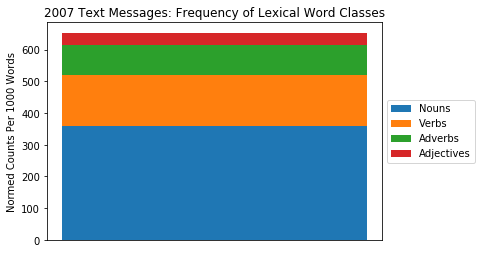

In [8]:
# Graph it!
width = 0.7
p1 = plt.bar(width=width, x=1, height=norm_counts_nouns)
p2 = plt.bar(width=width, x=1, height=norm_counts_verbs, bottom=norm_counts_nouns)
p3 = plt.bar(width=width, x=1, height=norm_counts_adverbs, bottom=norm_counts_nouns + norm_counts_verbs)
p4 = plt.bar(width=width, x=1, height=norm_counts_adjectives, bottom=norm_counts_nouns + norm_counts_verbs + norm_counts_adverbs)

plt.ylabel('Normed Counts Per 1000 Words')
plt.title('2007 Text Messages: Frequency of Lexical Word Classes')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

actual_last_value = norm_counts_nouns + norm_counts_verbs + norm_counts_adverbs
max_y_value = total_words * 1000
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=(p1[0], p2[0], p3[0], p4[0]), labels=('Nouns', 'Verbs', 'Adverbs', 'Adjectives'))
#plt.autoscale(False)
#plt.show()

### 6.  Summary
Summary Write-up

##### Footer: used to force updates
Last Updated: 11/12/2019 1:27 PM  